# Crop Disease Prediction

## Importing Dataset

## Importing libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


2024-03-26 10:46:29.962613: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-26 10:46:29.962639: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-26 10:46:29.962647: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-26 10:46:29.962921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-26 10:46:29.962936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [7]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [18]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-03-26 10:46:32.032002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 430s 193ms/step - accuracy: 0.3983 - loss: 2.1317 - val_accuracy: 0.8372 - val_loss: 0.5157
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 453s 206ms/step - accuracy: 0.8362 - loss: 0.5192 - val_accuracy: 0.9210 - val_loss: 0.2478
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 463s 211ms/step - accuracy: 0.9082 - loss: 0.2894 - val_accuracy: 0.9276 - val_loss: 0.2309
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 455s 207ms/step - accuracy: 0.9346 - loss: 0.1977 - val_accuracy: 0.9461 - val_loss: 0.1680
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 455s 207ms/step - accuracy: 0.9522 - loss: 0.1453 - val_accuracy: 0.9437 - val_loss: 0.1767
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 454s 207ms/step - accuracy: 0.9615 - loss: 0.1183 - val_accuracy: 0.9492 - val_loss: 0.1603
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 454s 207ms/step - accuracy: 0.9699 - loss: 0.0926 - val_accuracy: 0.9594 - val_loss: 0.1320
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 485s 221ms/step - accuracy: 0.9

## Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 104s 47ms/step - accuracy: 0.9842 - loss: 0.0482
Training accuracy: 0.985404372215271


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.9597 - loss: 0.1277
Validation accuracy: 0.9573753476142883


### Saving Model

In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6008535623550415,
  0.8609716296195984,
  0.9161248803138733,
  0.938060998916626,
  0.9549754858016968,
  0.9645920991897583,
  0.9714488983154297,
  0.9749768972396851,
  0.9790170192718506,
  0.9817625880241394],
 'loss': [1.3564423322677612,
  0.4359979033470154,
  0.26161831617355347,
  0.1878202259540558,
  0.1370050460100174,
  0.11008782684803009,
  0.08756501972675323,
  0.07593901455402374,
  0.06481244415044785,
  0.0559295117855072],
 'val_accuracy': [0.8372410535812378,
  0.9209538102149963,
  0.9276121258735657,
  0.9460505247116089,
  0.9437173008918762,
  0.949180543422699,
  0.9593671560287476,
  0.9648873209953308,
  0.9613589644432068,
  0.9573753476142883],
 'val_loss': [0.5156883597373962,
  0.24779601395130157,
  0.23091286420822144,
  0.16798323392868042,
  0.1767313927412033,
  0.1602577567100525,
  0.1319912225008011,
  0.1205555871129036,
  0.14204952120780945,
  0.13558392226696014]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

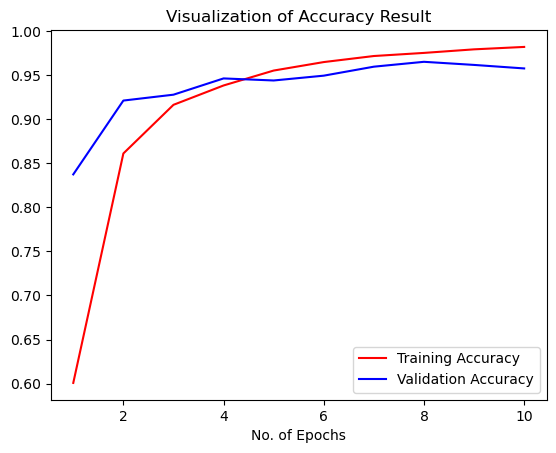

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-03-26 13:06:33.690350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.95      0.96       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.90      1.00      0.95       440
                                   Apple___healthy       0.96      0.87      0.92       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.91      1.00      0.95       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.96      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.91      0.

### Confusion Matrix Visualization

In [41]:
import pip
pip.main(['install','seaborn'])


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting seaborn

Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from seaborn) (2.2.1)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from seaborn) (3.8.0)

Requirement already satisfied: contourpy>=1.0.1 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.0)

Requirement already satisfied: cycler>=0.10 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.25.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.4)

Requirement already satisfied: packaging>=20.0 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.0)

Requirement already satisfied: pillow>=6.2.0 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.2.0)

Requirement already satisfied: pyparsing>=2.3.1 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.0.9)

Requirement already satisfied: python-dateutil>=2.7 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2023.3.post1)

Requirement already satisfied: tzdata>=2022.7 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2023.3)

Requirement already satisfied: six>=1.5 in /opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

Installing collected packages: seaborn

Successfully installed seaborn-0.13.2

0

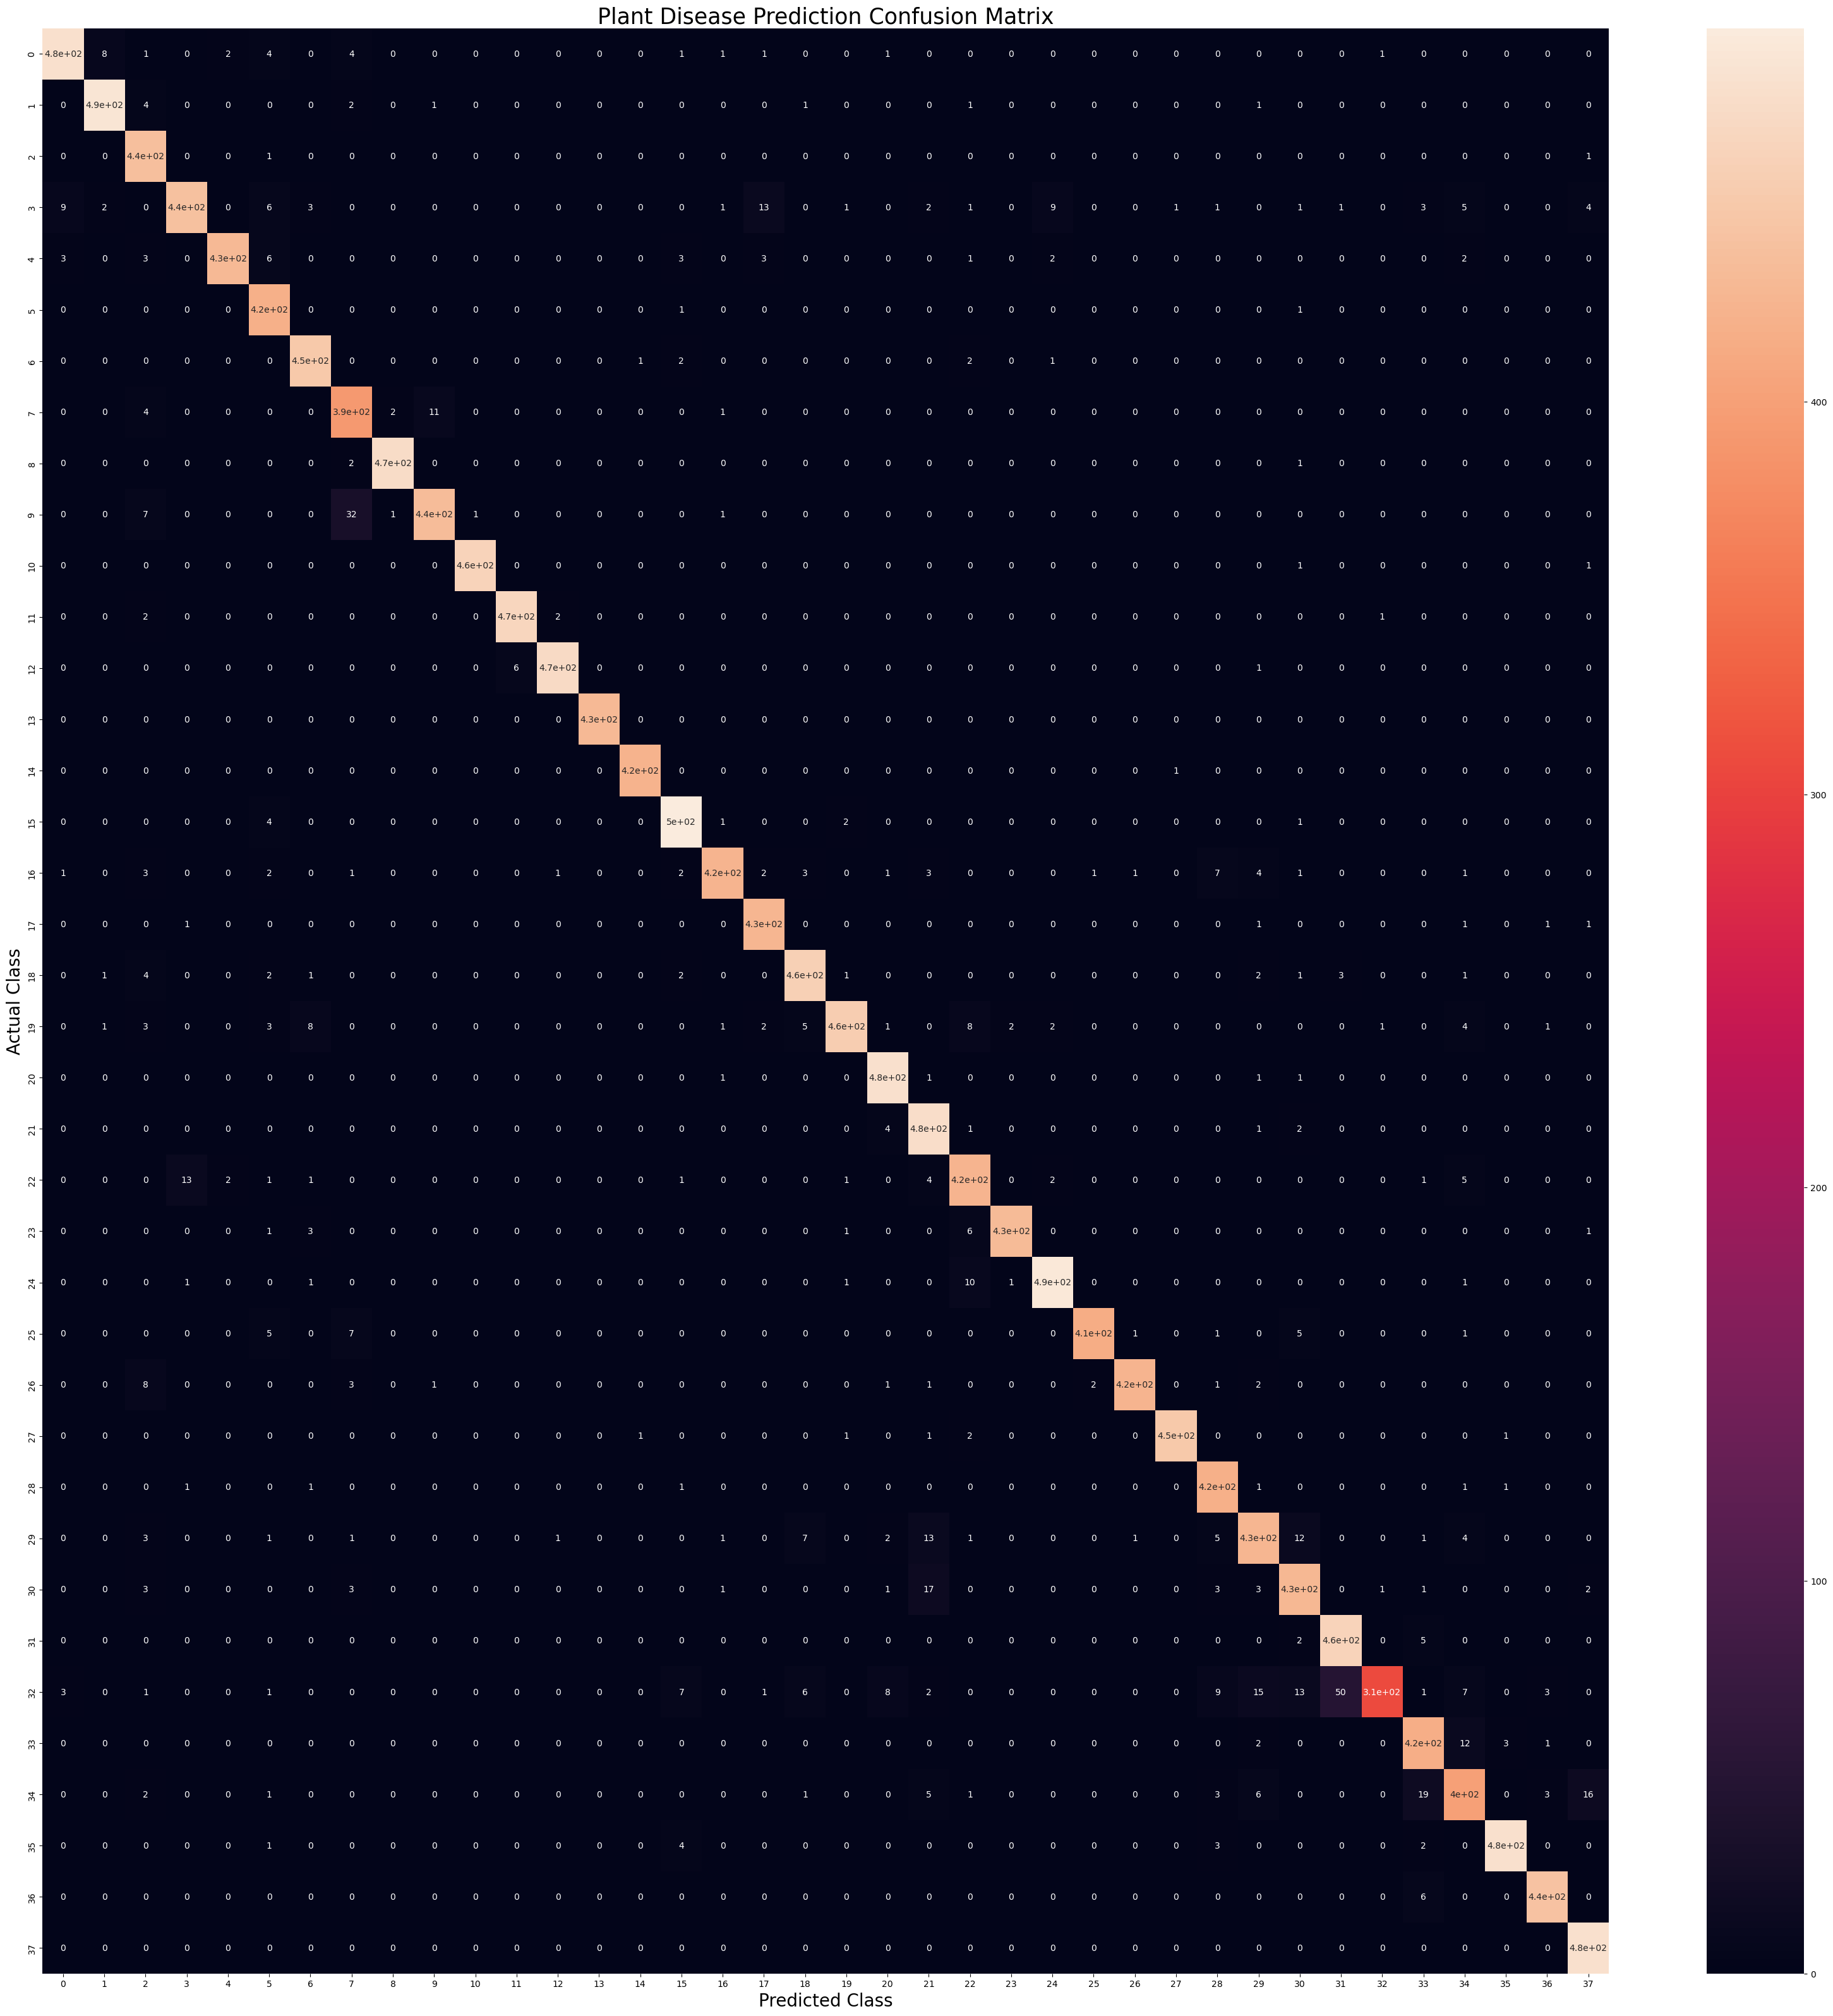

In [42]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()